In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

Ecuación diferencial de segundo orden de un péndulo con fricción:

$ \theta''(t) + b \theta'(t) + c \sin(\theta(t)) = 0$

Donde $b$ y $c$ son constantes positivas y (') denota la derivada. 

Para usar $\texttt{odeint}$ primero debemos convertir la ecuación en un sistema de ecuaciones de primer orden. Para ello definimos:

$\omega(t) = \theta'(t)$.

Así obtenemos el sistema:

$\theta'(t) = \omega(t)$,

$\omega'(t) = -b \omega(t) - c \sin(\theta(t))$

Sea $y$ el vector $y = [\theta, \omega].$

In [17]:
def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

valores de las constantes

In [46]:
b = 0.2
c = 5.0

Como condiciones iniciales asumiremos que el péndulo está a un ángulo cerca de $\pi$ y en reposo:

$\theta(0) = \pi - 0.1$,

$\omega(0) = 0$,

de modo que el vector de condiciones iniciales es $y_0 = [\pi - 0.1, 0]$

In [47]:
y0 = [np.pi - 0.1, 0.0]

Definimos el arreglo para $t$ y resolvemos el sistema.

In [48]:
t = np.linspace(0, 30, 1000)

# odeint(ecuaciones, cond. iniciales, var. independiente, argumentos)
sol = odeint(pend, y0, t, args=(b, c))

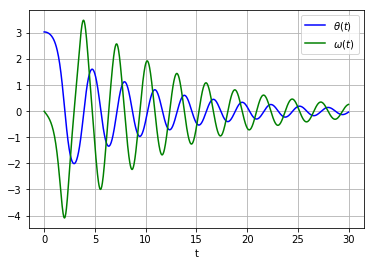

In [49]:
plt.plot(t, sol[:, 0], 'b', label=r'$\theta (t)$')
plt.plot(t, sol[:, 1], 'g', label=r'$\omega (t)$')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()